**1. Introduction**

The goal of this competition is to predict the type of trees in a certain area based on  various geographical features. The type of trees is represented by the feature *Cover-Type.* The seven cover types are:

1. [Spruce/Fir](http://https://en.wikipedia.org/wiki/Spruce-fir_forests)
2. [Lodgepole Pine](http://https://en.wikipedia.org/wiki/Pinus_contorta)
3. [Ponderosa Pine](http://https://en.wikipedia.org/wiki/Pinus_ponderosa)
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. [Krummholz](http://https://en.wikipedia.org/wiki/Krummholz)

You can click on some of the names to get more information about the type of forest.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("../input/learn-together/train.csv")
test = pd.read_csv("../input/learn-together/test.csv")

**2. Have a first look at the dataset**

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
Id                                    565892 non-null int64
Elevation                             565892 non-null int64
Aspect                                565892 non-null int64
Slope                                 565892 non-null int64
Horizontal_Distance_To_Hydrology      565892 non-null int64
Vertical_Distance_To_Hydrology        565892 non-null int64
Horizontal_Distance_To_Roadways       565892 non-null int64
Hillshade_9am                         565892 non-null int64
Hillshade_Noon                        565892 non-null int64
Hillshade_3pm                         565892 non-null int64
Horizontal_Distance_To_Fire_Points    565892 non-null int64
Wilderness_Area1                      565892 non-null int64
Wilderness_Area2                      565892 non-null int64
Wilderness_Area3                      565892 non-null int64
Wilderness_Area4                      565892 non-

The train set contains 15120 rows (observations) and 55 columns. One of these columns (Cover_Type) is the target variable, the other columns can be used to predict the target variable. All columns belong to the type int64, meaning that they are numerical. Lets have a look at the first five rows in our data set.

In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
print("The number of unique values per feature in the train set:")
print(train.nunique())

The number of unique values per feature in the train set:
Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7        

The features *Elevation* to *Horizontal_Distance_To_Fire_Points* all a numerical and have many different unique values. So there are likely to be continuous features.

The features Wilderness_Area1 to Soil_Type40 all have two unique values, except for Soil_Type7 and Soil_Type15, which have one unique value. These features are binary. Since Soil_Type7 and Soil_Type15 have only one unique value they can be discarded.

**Check for missings**

In [6]:
# get number of missings per column in train and test set
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


There are no missings in the train and test set.

**Check for duplicates**


In [7]:
print(train.duplicated(subset=None, keep='first').sum())
print(test.duplicated(subset=None, keep='first').sum())

0
0


There are no duplicate rows in the data set.

**3. Data cleaning**

Here I perform data cleaning on the data set. This includes making new variables, and dividing the train set into 7 different sets, one for each cover type.

In [8]:
# make 7 new train sets, one for each cover type
spruce = train[train.Cover_Type == 1]
lodgepole = train[train.Cover_Type == 2]
ponderosa = train[train.Cover_Type == 3]
cottonwood = train[train.Cover_Type == 4]
aspen = train[train.Cover_Type == 5]
douglas = train[train.Cover_Type == 6]
krummholz = train[train.Cover_Type == 7]

**4. Examine the target variable Cover_Type**

Each cover type appaers 2160 times in the dataset.

**5 Examine the predictor features**

**5.1 Continuous features**

Here I examine how the continuous features. The first 10 columns are continuous features. So lets describe these features.

In [9]:
myvars = list(train.columns[:10])
train[myvars].describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000


The first feature Elevation gives information about the altitude in meters. The lowest location is at 1863 meters, the highest location is at 3849 meters. The avarage altitude is at 2749 meters. 

The second feature Aspect gives information about Aspect in degrees azimuth. I have no idea what that means. This value ranges between 0 and 360 degrees, and its average is 156.67.

The feature Slope gives the Slope in degrees and is thus a measure how steap the location is. This features ranges from 0 (no slope) to 52 degrees. The avarage slope is 16.5 degrees.

The feature Horizontal_Distance_To_Hydrology gives information about the horizontal distance to nearest surface water. Its value ranges between 0 and 1343 meters. On avarage this value is 227 meters.

The feature Horizontal_Distance_To_Roadways gives information about how far a location is from the nearest roadway. It ranges between 0 and 6890. On avarage a location is 1714 meters from the nearest roadway.

Note that vertical distance to hydrology contains negative values!!!

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points



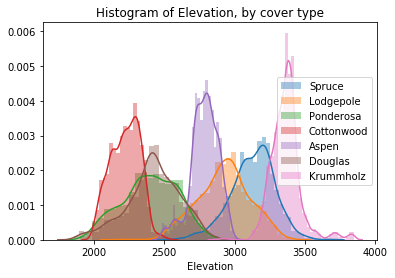

In [10]:
sns.distplot(a = spruce['Elevation'], label = "Spruce")
sns.distplot(a = lodgepole['Elevation'], label = "Lodgepole")
sns.distplot(a = ponderosa['Elevation'], label = "Ponderosa")
sns.distplot(a = cottonwood['Elevation'], label = "Cottonwood")
sns.distplot(a = aspen['Elevation'], label = "Aspen")
sns.distplot(a = douglas['Elevation'], label = "Douglas")
sns.distplot(a = krummholz['Elevation'], label = "Krummholz")

# Add title
plt.title("Histogram of Elevation, by cover type")

# Force legend to appear
plt.legend()

It seems that each cover type favours a particular Elevation. For example Cottonwood is mainly found between 2000 and 2500 meters, Aspen is mainly found between 2500 and 3000 meters, krummholz between 3000 and 4000 meters. Ponderosa and Douglas is found between 2000 and almost 3000 meters. Lodgepole is found between 2500 and 3500 meters. Spruce is found between 2500 and 3500 meters.

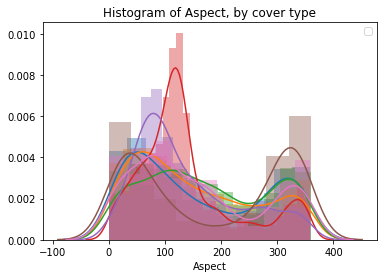

In [11]:
sns.distplot(a = spruce['Aspect'])
sns.distplot(a = lodgepole['Aspect'])
sns.distplot(a = ponderosa['Aspect'])
sns.distplot(a = cottonwood['Aspect'])
sns.distplot(a = aspen['Aspect'])
sns.distplot(a = douglas['Aspect'])
sns.distplot(a = krummholz['Aspect'])

# Add title
plt.title("Histogram of Aspect, by cover type")

# Force legend to appear
plt.legend()

It seems that Aspect follows a non normal distribution. 

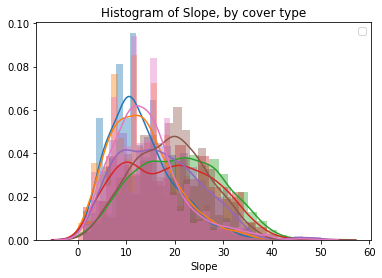

In [12]:
sns.distplot(a = spruce['Slope'])
sns.distplot(a = lodgepole['Slope'])
sns.distplot(a = ponderosa['Slope'])
sns.distplot(a = cottonwood['Slope'])
sns.distplot(a = aspen['Slope'])
sns.distplot(a = douglas['Slope'])
sns.distplot(a = krummholz['Slope'])

# Add title
plt.title("Histogram of Slope, by cover type")

# Force legend to appear
plt.legend()

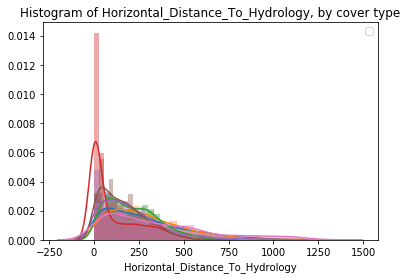

In [13]:
sns.distplot(a = spruce['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = lodgepole['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = ponderosa['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = cottonwood['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = aspen['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = douglas['Horizontal_Distance_To_Hydrology'])
sns.distplot(a = krummholz['Horizontal_Distance_To_Hydrology'])

# Add title
plt.title("Histogram of Horizontal_Distance_To_Hydrology, by cover type")

# Force legend to appear
plt.legend()

Horizontal distance to hydrology follows a right skewed distribution. 

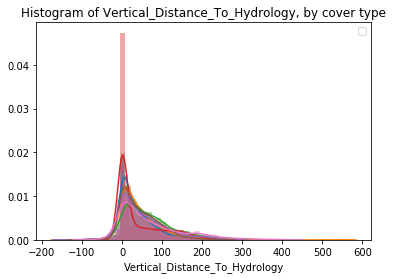

In [14]:
sns.distplot(a = spruce['Vertical_Distance_To_Hydrology'])
sns.distplot(a = lodgepole['Vertical_Distance_To_Hydrology'])
sns.distplot(a = ponderosa['Vertical_Distance_To_Hydrology'])
sns.distplot(a = cottonwood['Vertical_Distance_To_Hydrology'])
sns.distplot(a = aspen['Vertical_Distance_To_Hydrology'])
sns.distplot(a = douglas['Vertical_Distance_To_Hydrology'])
sns.distplot(a = krummholz['Vertical_Distance_To_Hydrology'])

# Add title
plt.title("Histogram of Vertical_Distance_To_Hydrology, by cover type")

# Force legend to appear
plt.legend()

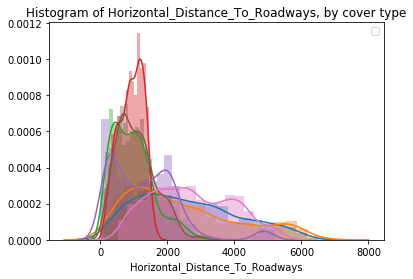

In [15]:
sns.distplot(a = spruce['Horizontal_Distance_To_Roadways'])
sns.distplot(a = lodgepole['Horizontal_Distance_To_Roadways'])
sns.distplot(a = ponderosa['Horizontal_Distance_To_Roadways'])
sns.distplot(a = cottonwood['Horizontal_Distance_To_Roadways'])
sns.distplot(a = aspen['Horizontal_Distance_To_Roadways'])
sns.distplot(a = douglas['Horizontal_Distance_To_Roadways'])
sns.distplot(a = krummholz['Horizontal_Distance_To_Roadways'])

# Add title
plt.title("Histogram of Horizontal_Distance_To_Roadways, by cover type")

# Force legend to appear
plt.legend()

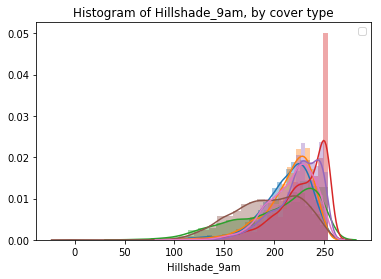

In [16]:
sns.distplot(a = spruce['Hillshade_9am'])
sns.distplot(a = lodgepole['Hillshade_9am'])
sns.distplot(a = ponderosa['Hillshade_9am'])
sns.distplot(a = cottonwood['Hillshade_9am'])
sns.distplot(a = aspen['Hillshade_9am'])
sns.distplot(a = douglas['Hillshade_9am'])
sns.distplot(a = krummholz['Hillshade_9am'])

# Add title
plt.title("Histogram of Hillshade_9am, by cover type")

# Force legend to appear
plt.legend()

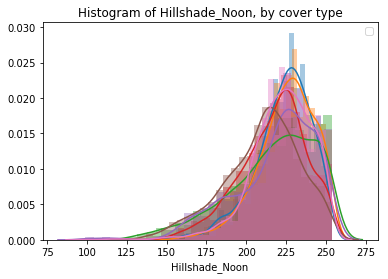

In [17]:
sns.distplot(a = spruce['Hillshade_Noon'])
sns.distplot(a = lodgepole['Hillshade_Noon'])
sns.distplot(a = ponderosa['Hillshade_Noon'])
sns.distplot(a = cottonwood['Hillshade_Noon'])
sns.distplot(a = aspen['Hillshade_Noon'])
sns.distplot(a = douglas['Hillshade_Noon'])
sns.distplot(a = krummholz['Hillshade_Noon'])

# Add title
plt.title("Histogram of Hillshade_Noon, by cover type")

# Force legend to appear
plt.legend()

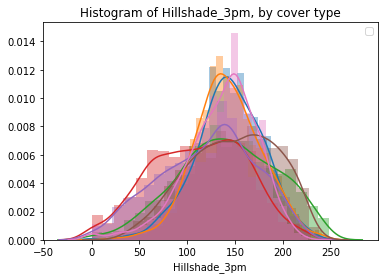

In [18]:
sns.distplot(a = spruce['Hillshade_3pm'])
sns.distplot(a = lodgepole['Hillshade_3pm'])
sns.distplot(a = ponderosa['Hillshade_3pm'])
sns.distplot(a = cottonwood['Hillshade_3pm'])
sns.distplot(a = aspen['Hillshade_3pm'])
sns.distplot(a = douglas['Hillshade_3pm'])
sns.distplot(a = krummholz['Hillshade_3pm'])

# Add title
plt.title("Histogram of Hillshade_3pm, by cover type")

# Force legend to appear
plt.legend()

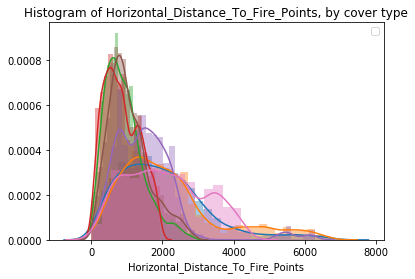

In [19]:
sns.distplot(a = spruce['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = lodgepole['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = ponderosa['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = cottonwood['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = aspen['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = douglas['Horizontal_Distance_To_Fire_Points'])
sns.distplot(a = krummholz['Horizontal_Distance_To_Fire_Points'])

# Add title
plt.title("Histogram of Horizontal_Distance_To_Fire_Points, by cover type")

# Force legend to appear
plt.legend()

**5.2 Wilderness Area**

There are four different types of wilderness area: 

1. Wilderness_area1: [Rawah Wilderness Area ](https://en.wikipedia.org/wiki/Rawah_Wilderness)
2. Wilderness_area2: [Neota Wilderness Area](https://en.wikipedia.org/wiki/Neota_Wilderness)
3. Wilderness_area3: [Comanche Peak Wilderness Area](https://en.wikipedia.org/wiki/Comanche_Peak_Wilderness)
4. Wilderness_area4: [Cache la Poudre Wilderness Area](https://en.wikipedia.org/wiki/Cache_La_Poudre_Wilderness) 

For these four variables a 0 means that the type of wilderness is absent, a 1 means that the type of wilderness area is present. Lets see how many sites are located in the different wilderess areas:

In [20]:
print("Number of sites in the Rawah Wilderness Area:", train.Wilderness_Area1.sum())
print("Number of sites in the Neota Wilderness Area:", train.Wilderness_Area2.sum())
print("Number of sites in the Comanche Wilderness Area:", train.Wilderness_Area3.sum())
print("Number of sites in the Cache la Poudre Wilderness Area:", train.Wilderness_Area4.sum())

Number of sites in the Rawah Wilderness Area: 3597
Number of sites in the Neota Wilderness Area: 499
Number of sites in the Comanche Wilderness Area: 6349
Number of sites in the Cache la Poudre Wilderness Area: 4675


This plot tells us that Ponderosa Pine, Douglas-fir and Cottonwood/willow forests are not present in the Rawah wilderness area. The other forest types are common in the Rawah Wilderness area.  

The aspen, Ponderosa Pine, Douglas-fir and cottonwood/willow forests are not present in the Netoa wilderness area. The following types of forest are present: lodgepole pine, spruce/fir and krummholz. But they are relatively rare.

Only cottonwood/willow forests are not present in the Comanche wilderness areas.

Aspen, Lodgepole pine, spruce/fir and krummholz are not present in the Cache la Poudre wilderness area. Cottonwood/willow, ponderosa pine and douglas-fir woods are present in this wilderness Area.

**5.3 Soil Types**

More to come

In [21]:
colnames = list(train.columns[14:54])
for i in colnames:
    print(i)
    print(train[i].sum())

Wilderness_Area4
4675
Soil_Type1
355
Soil_Type2
623
Soil_Type3
962
Soil_Type4
843
Soil_Type5
165
Soil_Type6
650
Soil_Type7
0
Soil_Type8
1
Soil_Type9
10
Soil_Type10
2142
Soil_Type11
406
Soil_Type12
227
Soil_Type13
476
Soil_Type14
169
Soil_Type15
0
Soil_Type16
114
Soil_Type17
612
Soil_Type18
60
Soil_Type19
46
Soil_Type20
139
Soil_Type21
16
Soil_Type22
345
Soil_Type23
757
Soil_Type24
257
Soil_Type25
1
Soil_Type26
54
Soil_Type27
15
Soil_Type28
9
Soil_Type29
1291
Soil_Type30
725
Soil_Type31
332
Soil_Type32
690
Soil_Type33
616
Soil_Type34
22
Soil_Type35
102
Soil_Type36
10
Soil_Type37
34
Soil_Type38
728
Soil_Type39
657


Here we already see that some soil types are very rare. These very rare soil type will not add much value when predicting forest types and should be removed when trying to predict forest type.

Dropping Soil_Types that have sum of less than 50.

In [22]:
col=[]
for i in colnames:
    if(train[i].sum()<=50):
        train=train.drop(i,axis=1)
        col.append(i)
    

In [23]:
col

['Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type15',
 'Soil_Type19',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type36',
 'Soil_Type37']

In [24]:
test=test.drop(col,axis=1)

In [25]:
test.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type10                           int64
Soil_Type11                     

In [26]:
X=train

In [27]:
X=X.drop(['Cover_Type'],axis=1)

In [28]:
y=train['Cover_Type']

In [29]:
X.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type10                           int64
Soil_Type11                     

In [30]:
X.shape

(15120, 43)

In [31]:
test.shape

(565892, 43)

In [32]:
test.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type10                           int64
Soil_Type11                     

In [33]:
y.shape

(15120,)

In [34]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,1,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,1,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,1,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,1,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,1,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

# xgb_model = xgb.XGBClassifier()

# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic'],
#               'learning_rate': [0.05], #so called `eta` value
#               'max_depth': [6],
#               'min_child_weight': [11],
#               'silent': [1],
#               'subsample': [0.8],
#               'colsample_bytree': [0.7],
#               'n_estimators': [5], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [1337]}

# clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(X_train, n=5, shuffle=True), 
#                    verbose=2, refit=True)


In [37]:
X.shape

(15120, 43)

In [38]:
X_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
3388,3389,2149,98,19,0,0,780,247,210,84,...,0,0,0,0,0,0,0,0,0,0
10782,10783,2606,237,30,90,29,1445,153,249,221,...,0,0,0,0,0,0,0,0,0,0
13624,13625,3015,4,7,30,0,1980,211,226,153,...,0,0,0,1,0,0,0,0,0,0
7855,7856,3405,27,13,591,166,3132,214,212,132,...,0,0,0,0,0,0,0,0,1,0
11884,11885,3235,333,6,108,5,4596,205,232,165,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 13.8min finished


0.8749259624876604

In [40]:
predict=RFC_best.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.8741482965931864

In [42]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,1,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,1,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,1,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,1,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,1,0,0,0,0,0,0,0,0


In [43]:
X_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
3388,3389,2149,98,19,0,0,780,247,210,84,...,0,0,0,0,0,0,0,0,0,0
10782,10783,2606,237,30,90,29,1445,153,249,221,...,0,0,0,0,0,0,0,0,0,0
13624,13625,3015,4,7,30,0,1980,211,226,153,...,0,0,0,1,0,0,0,0,0,0
7855,7856,3405,27,13,591,166,3132,214,212,132,...,0,0,0,0,0,0,0,0,1,0
11884,11885,3235,333,6,108,5,4596,205,232,165,...,0,0,0,0,0,0,0,0,1,0


In [44]:
test_pred=RFC_best.predict(test)

In [45]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,1,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,1,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,1,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,1,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,1,0,0,0,0,0,0,0,0


In [46]:
test.index

RangeIndex(start=0, stop=565892, step=1)

In [47]:
test

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type26,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,1,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,1,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,1,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,1,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,1,0,0,0,0,0,0,0,0
5,15126,2699,21,18,30,3,2890,206,200,127,...,0,1,0,0,0,0,0,0,0,0
6,15127,2699,15,17,30,6,2860,202,202,133,...,0,1,0,0,0,0,0,0,0,0
7,15128,2696,10,16,30,6,2830,202,207,140,...,0,1,0,0,0,0,0,0,0,0
8,15129,2696,17,13,30,6,2770,208,211,138,...,0,1,0,0,0,0,0,0,0,0
9,15130,2693,14,15,30,7,2741,205,209,138,...,0,1,0,0,0,0,0,0,0,0


In [48]:
output = pd.DataFrame({'Id':test['Id'],'Cover_Type':test_pred})

#Visualize the first 5 rows
output.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 